In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as scisig

In [5]:
trace = pd.read_csv(r"C:\Users\elias\Desktop\physics-111B\NMR\NMR-data\lock-in-data\Mn 1.csv", sep='\t', header=None)
display(trace)

,0,1
0,0.00,0.903164
1,0.05,0.909932
2,0.10,0.909610
3,0.15,0.908965
4,0.20,0.910577
...,...,...
11785,589.25,0.910899
11786,589.30,0.895590
11787,589.35,0.893978
11788,589.40,0.895106


array([0.0000e+00, 5.0000e-02, 1.0000e-01, ..., 5.8935e+02, 5.8940e+02,
       5.8945e+02])

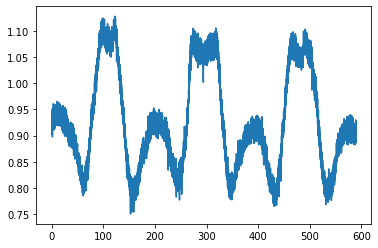

In [7]:
plt.plot(trace[0].values,trace[1].values)
display(trace[0].to_numpy())

(0.75, 1.15)

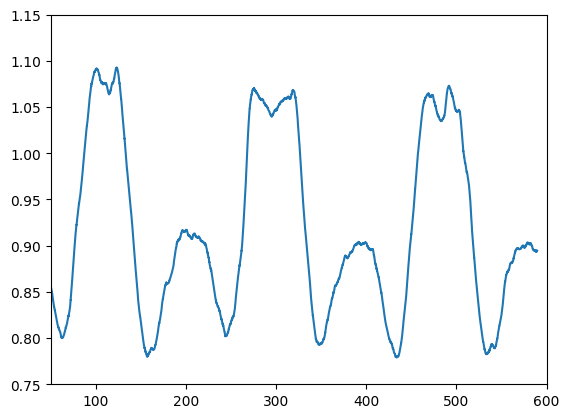

In [ ]:
plt.plot(trace[0].to_numpy(),scisig.lfilter([1.0 / 50] * 50,1,trace[1]))
plt.xlim(0, 600)
plt.ylim(0.75,1.15)
plt.title("Lock-in trace for 1M Mn - Low Pass Filtered Signal")
plt.xlabel("Time (s)")
plt.ylabel("Signal (V)")

(50.0, 600.0)

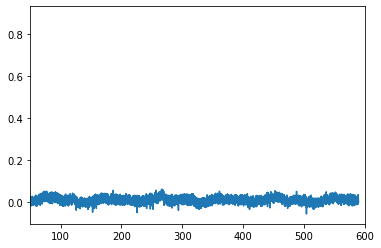

In [19]:
plt.plot(trace[0].to_numpy(), trace[1].to_numpy()-scisig.lfilter([1.0 / 50] * 50,1,trace[1]))
plt.xlim(50, 600)
plt.title("Lock-in trace for 1M Mn - Filtered Noise")
plt.xlabel("Time (s)")
plt.ylabel("Signal (V)")
#plt.ylim(0.75,1.15)

In [20]:
sn = (np.sum(scisig.lfilter([1.0 / 50] * 50,1,trace[1])**2)/len(trace[1])) / (np.sum(trace[1]-scisig.lfilter([1.0 / 50] * 50,1,trace[1]))**2/len(trace[1]))

In [21]:
display(sn)

20.826209579981057

0.2967539429664612 0.0


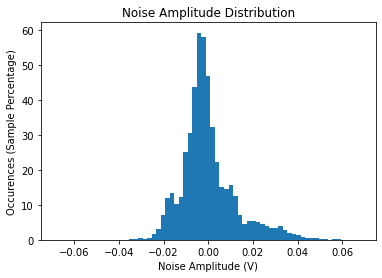

In [60]:
# Assuming 'data' is the variable containing your data
data = trace[1] - scisig.lfilter([1.0 / 100] * 100, 1, trace[1])
bins = np.linspace(-0.1, 0.1, 100)
plt.hist(trace[1]-scisig.lfilter([1.0 / 50] * 50,1,trace[1]), bins, density=True)
plt.xlim(-0.075, 0.075)
plt.title("Noise Amplitude Distribution")
plt.ylabel("Occurences (Sample Percentage)")
plt.xlabel("Noise Amplitude (V)")

from scipy.stats import zscore
import matplotlib.pyplot as plt
from scipy.stats import shapiro, anderson

# Perform normality tests on the normalized data
stat, p_value = shapiro(data)
print(stat, p_value)

In [34]:
a = np.random.randn(1000)